# **Global Climate Change 🌎**

This notebook provides a walkthrough of several key environmental factors associated with climate change, with cleaned tabular and graphical data from NASA showing the extent and severity of its impacts. The datasets we focus on in this notebook are: atmospheric CO2 concentrations since 1970 compared with historic CO2 levels derived from ice core samples, average mean temperatures since 1880, sea level rise, the decline in the ice mass of the Greenland and Antarctica ice sheets, and the decline in Arctic sea ice.

In [1]:
#importing libraries we'll use throughout the notebook
import pandas as pd
from plotnine import *
import ibis
import re
import os
from plotnine import *

## **Examining CO2 trends 🏭**

**Data Description**: http://climate.nasa.gov/vital-signs/carbon-dioxide/

**Data Set**: https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt

In [2]:
columns = ['Year', 'Month', 'Decimal_date', 'CO2 (ppm)', 'Smooth', 'Std_days', 'Uncertainty', 'Empty']
carbon_dioxide_data = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt",
                  sep = '\\s+',
                  comment = '#',
                  header = None,
                  names = columns
                  )
carbon_dioxide_data.head(12)

,Year,Month,Decimal_date,CO2 (ppm),Smooth,Std_days,Uncertainty,Empty
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
5,1958,8,1958.6219,314.93,316.21,-1,-9.99,-0.99
6,1958,9,1958.7068,313.21,316.11,-1,-9.99,-0.99
7,1958,10,1958.7890,312.42,315.41,-1,-9.99,-0.99
8,1958,11,1958.8740,313.33,315.21,-1,-9.99,-0.99
9,1958,12,1958.9562,314.67,315.43,-1,-9.99,-0.99


In [3]:
# Calculations to validate which month had the highest or lowest CO2 
selected = carbon_dioxide_data[['Month', 'CO2 (ppm)']]
selected.groupby('Month').mean().sort_values(by = 'CO2 (ppm)', ascending = False)

,CO2 (ppm)
Month,
5,363.392206
6,362.835588
4,362.810294
3,361.511029
2,361.350299
7,361.300147
1,360.565373
12,359.483433
8,359.275588


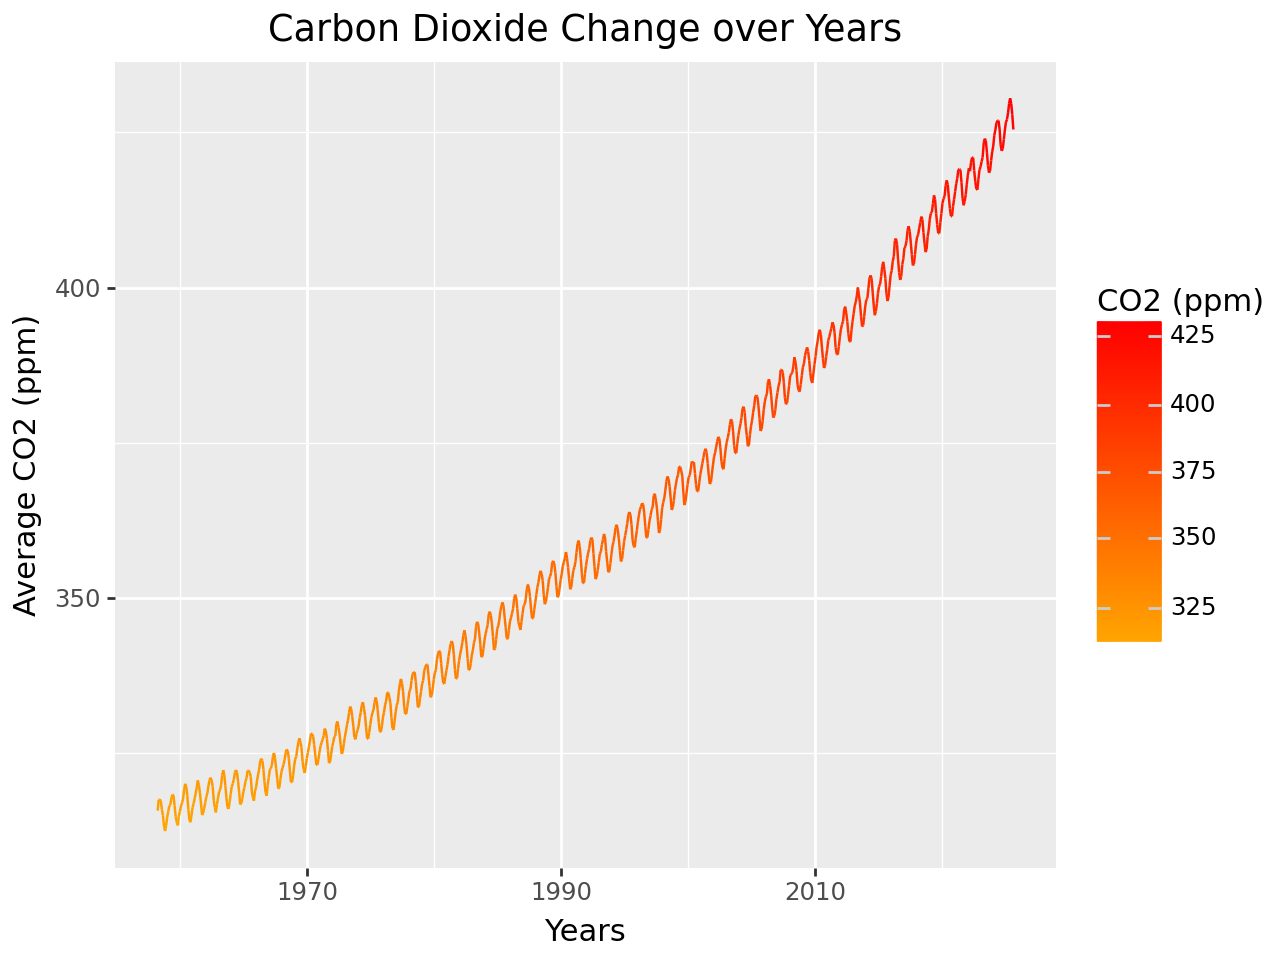

In [4]:
ggplot(carbon_dioxide_data, aes(x="Decimal_date", y="CO2 (ppm)", color="CO2 (ppm)")) + geom_line() + labs(y = 'Average CO2 (ppm)', x = 'Years', title = 'Carbon Dioxide Change over Years') + scale_color_gradient(low='orange', high='red')

We can observe an annual fluctuation in CO2 levels. The average CO2 value is, on average, at its highest during the late-spring and early-summer season, specifically in May, where the average CO2 value across the years is 363.39 ppm. This high value may be attributed to the low levels of photosynthesis in the winter months and the decomposition of organic material from the previous year's growing season that release CO2 into the atmosphere faster than it can be absorbed. On the other hand, the lowest average CO2 values across the year are mostly during the mid-fall season, specifically in September, October, and November, with an average of 356-358 ppm. This low value may be attributed to high levels of photosynthesis throughout the summer months in the northern hemisphere (where the majority of the productive land area of the planet is located); high levels of photosynthesis due to increased sunlight exposure systematically reduce the CO2 present in the atmosphere. These conclusions were determined by reorganizing the dataset using the Pandas function, .groupby(), to find the average of the CO2 value for each of the 12 months. 

Despite the annual fluctuations, it is clear that the CO2 levels have increased significantly since 1958. However, more data is needed to put these changes in a historical context.

------------------------

## **Longer term trends in CO2 Records 👣**

The data we analyzed above included CO2 records dating back only as far as the measurements at the Manua Loa observatory.  To put these values into geological perspective requires looking back much farther than humans have been monitoring atmosopheric CO2 levels.  To do this, we need another approach. Enter ice core sampling.

This dataset comes from analysis of a 3,623 meter ice core taken from East Antarctica in 1998. The air trapped in this ice core provides information about the Earth’s atmosphere spanning four hundred thousand years back, far before human society had any impact on the climate. The ice was cut in a cold room and crushed in a vacuum to extract the gas; then the CO2 concentration was analyzed using gas chromatography. The original table includes information about the depth (m) and age (years) of the ice the air was found in, as well as the mean age of air in the sample and the concentration of CO2 (ppm). In the cleaning of this dataset we subtracted the mean age of the air from the current year (2025) to generate a new column (year). Negative values represent years BCE. 


- **Description of data set**: <http://cdiac.esd.ornl.gov/trends/co2/vostok.html>
- **Data source**:  <https://doi.org/10.3334/CDIAC/ATG.009>
    

### Importing Vostok ice core data

In [5]:
vostok_ice = pd.read_csv('Vostok Ice Core Records/vostok.icecore.co2', sep = '\\s+', header=19, 
            names = ['Depth (m)', "Age of ice (year BP)", "Mean age of air (year BP)", "CO2 (ppm)"],
            index_col=False)
vostok_ice["Year"] = 2025 - vostok_ice["Mean age of air (year BP)"]
vostok_ice.head(5)

/tmp/ipykernel_10970/505287760.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.


,Depth (m),Age of ice (year BP),Mean age of air (year BP),CO2 (ppm),Year
0,149.1,5679,2342,284.7,-317
1,173.1,6828,3634,272.8,-1609
2,177.4,7043,3833,268.1,-1808
3,228.6,9523,6220,262.2,-4195
4,250.3,10579,7327,254.6,-5302


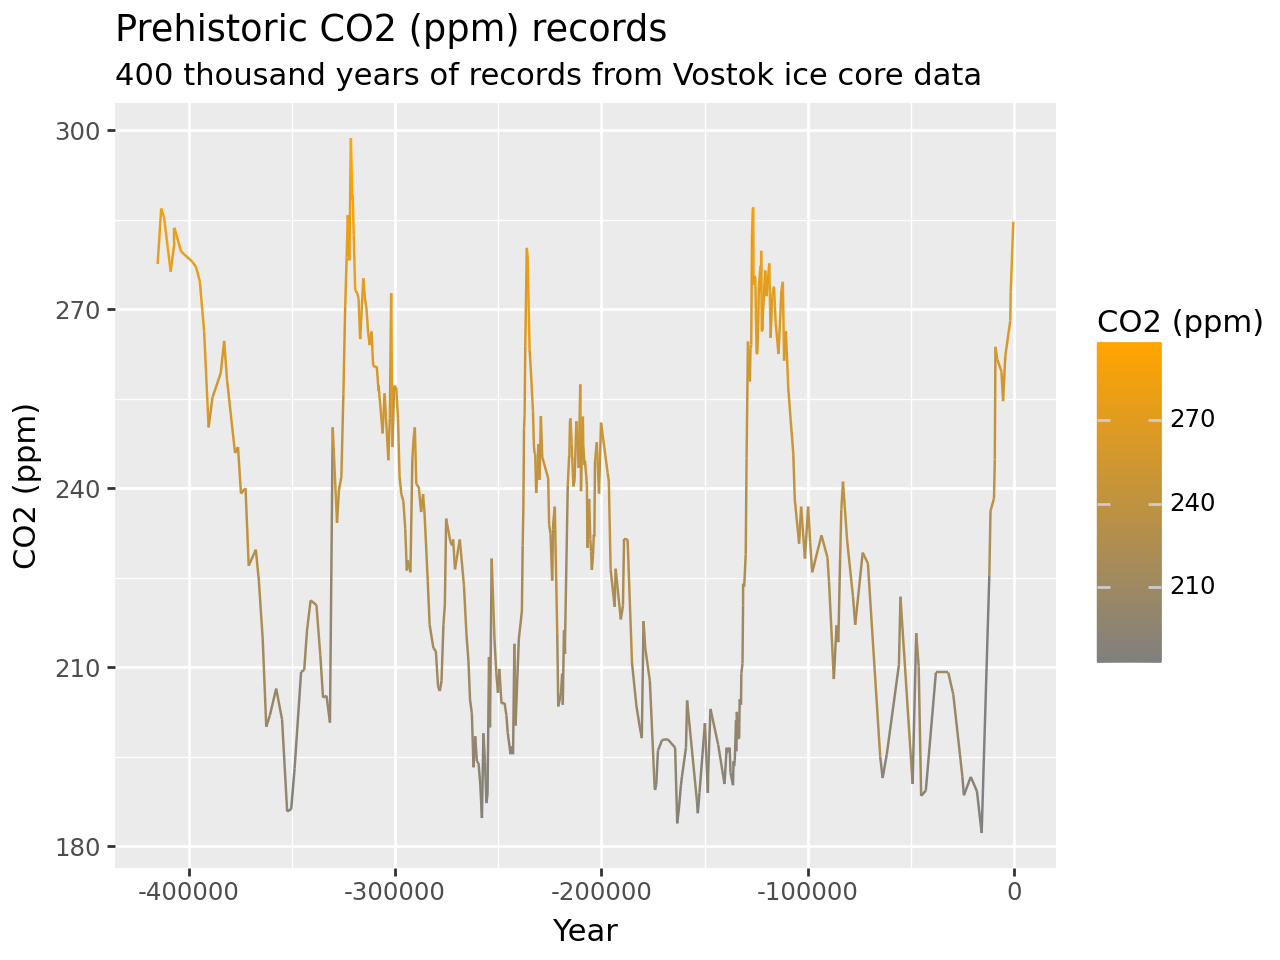

In [6]:
ggplot(vostok_ice, aes(x="Year", y="CO2 (ppm)", color="CO2 (ppm)")) + geom_line() + scale_color_gradient(low='grey', high='orange') + ggtitle("Prehistoric CO2 (ppm) records", subtitle="400 thousand years of records from Vostok ice core data")

The CO2 records preserved in ice cores fluctuate between 180 and 300 ppm, increasing and decreasing on roughly 100000 year cycles. This plot shows the natural range of CO2 levels in Earth’s atmosphere, including its natural extremes. In 400000 years of natural variation, the CO2 levels in Earth's atmosphere appear to never climb above 300 ppm.

### Comparing historical and modern records

Let's plot the modern records from the Mauna Loa Observatory on the same axes as the historical ice core data so that we can visually compare the CO2 levels present in each time period. The historical ice core data has already been adjusted so that the year graphed directly corresponds to BCE years, so no further chronological adjustments are necessary.

In [7]:
ice_core_data = vostok_ice[['Year', 'CO2 (ppm)']]
modern_data = carbon_dioxide_data.groupby('Year').mean().reset_index()[['Year', 'CO2 (ppm)']]
merged_data = pd.concat([ice_core_data, modern_data])
merged_data.head(5)

,Year,CO2 (ppm)
0,-317,284.7
1,-1609,272.8
2,-1808,268.1
3,-4195,262.2
4,-5302,254.6


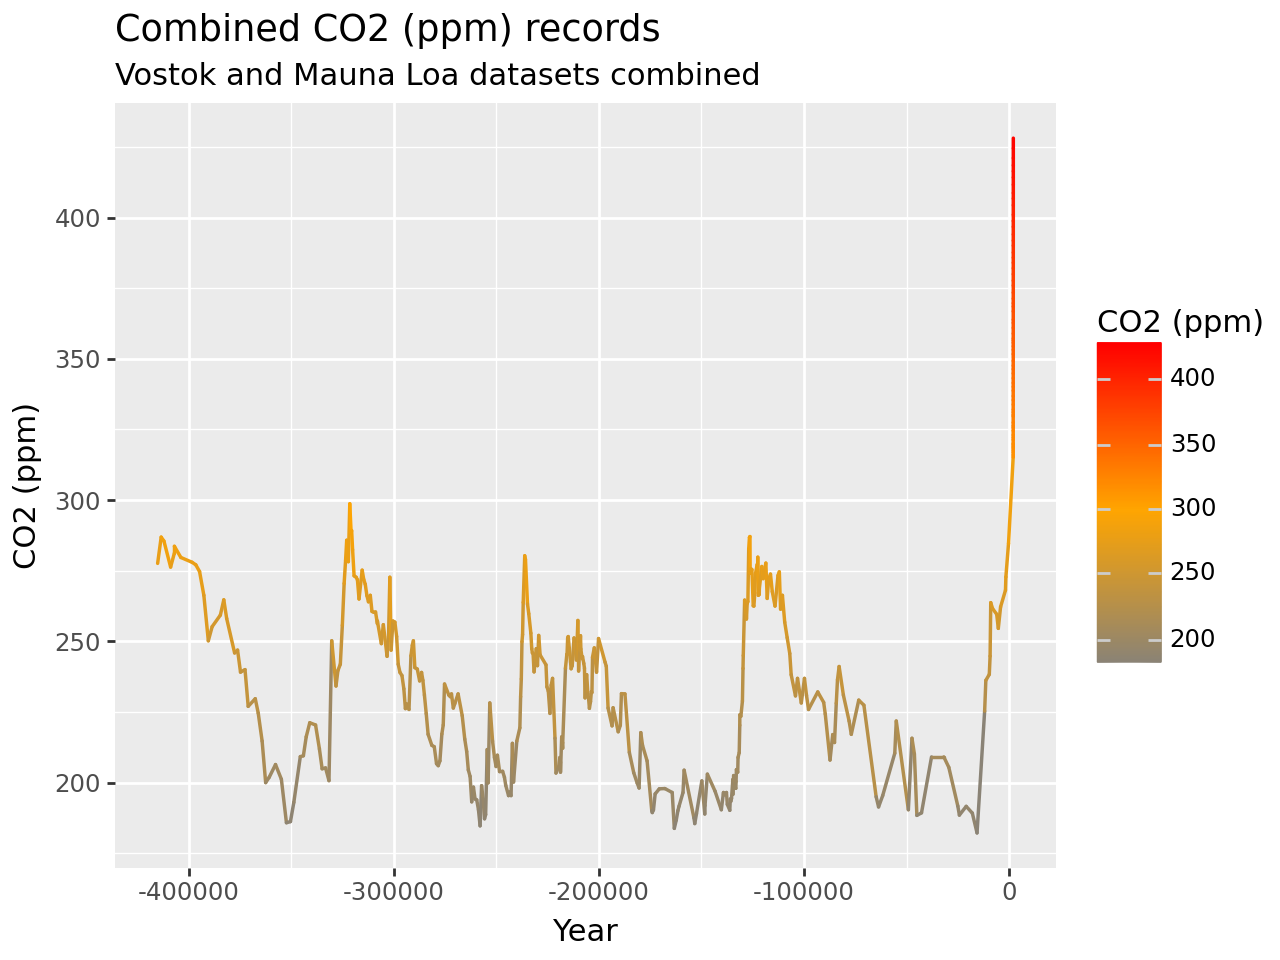

In [8]:
ggplot(merged_data, aes(x="Year", y="CO2 (ppm)", color='CO2 (ppm)')) + geom_line(size=0.7, lineend='round') + scale_color_gradient2(low='grey', mid='orange', high='red', midpoint=300) + ggtitle("Combined CO2 (ppm) records", subtitle="Vostok and Mauna Loa datasets combined")   

In the plot above, we can clearly see that the CO2 levels we have observed since 1970 (the sharp incline on the far right side of the graph takes place over just a tiny fraction of the geologic time scale over which the ice core data spans) are unprecedented in the last 400000 years of Earth's history. While natural variation certainly causes some fluctuation in Earth's atmospheric CO2 levels, and the trend of the graph seems to suggest that in the modern era we are naturally experiencing an upward trend in CO2 levels, the current levels exceed the maximum levels achieved on record by over 100 ppm and climbing. Natural variation, therefore, can't account for this trend; we must conclude that human activity must be responsible for it.

***

## **Changes in Global Annual Temperature** 📈

**Data** from: <http://climate.nasa.gov/vital-signs/global-temperature>

**Data Set**: http://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt

The dataset compiles the global mean temperature from 1880 to 2021 and is sourced by the NASA Goddard Institute for Space Studies. These data are mined from different data sources, namely land weather stations (e.g. the Global Historical Climatology Network (GHCN)), ocean measurements from ships and buoys, and antarctic stations.

The three columns, “Year”, “No_Smoothing”, and “Lowess(5)”, cohesively represent the global temperature anomalies, with “No_Smoothing” specifically representing the raw, annual average temperature data points for each year in degrees Celsius and “Lowess(5)” representing the smoothed version of the temperature data processed using the Locally Weighted Scatterplot Smoothing statistical method in degrees Celsius. LOWESS is used in regression analysis to create a regressive, smooth line through a scatter plot to draw the relationship between different variables. The temperature represents how deviated it is from the baseline average of each year, which is the baseline period of the 30-year average from 1951 to 1980.

In [9]:
# Data Processing & Cleaning
columns_nasa = ['Year', 'No_Smoothing', 'Lowess(5)']
temp_data = pd.read_csv('https://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt',
                  sep = '\\s+',
                  comment = '#',
                  header = 3,
                  names = columns_nasa)

# Data Frame Manipulate to Pivot Table
temp_data_longer = temp_data.melt(id_vars=['Year'], value_vars=['No_Smoothing', 'Lowess(5)'])
temp_data_longer = temp_data_longer.rename(columns = {
    'variable' : 'Data_Smoothing_Type',
    'value' : 'Temperature_Data (C)'})

temp_data_longer

,Year,Data_Smoothing_Type,Temperature_Data (C)
0,1880,No_Smoothing,-0.16
1,1881,No_Smoothing,-0.08
2,1882,No_Smoothing,-0.11
3,1883,No_Smoothing,-0.17
4,1884,No_Smoothing,-0.28
...,...,...,...
279,2017,Lowess(5),0.91
280,2018,Lowess(5),0.92
281,2019,Lowess(5),0.93
282,2020,Lowess(5),0.94


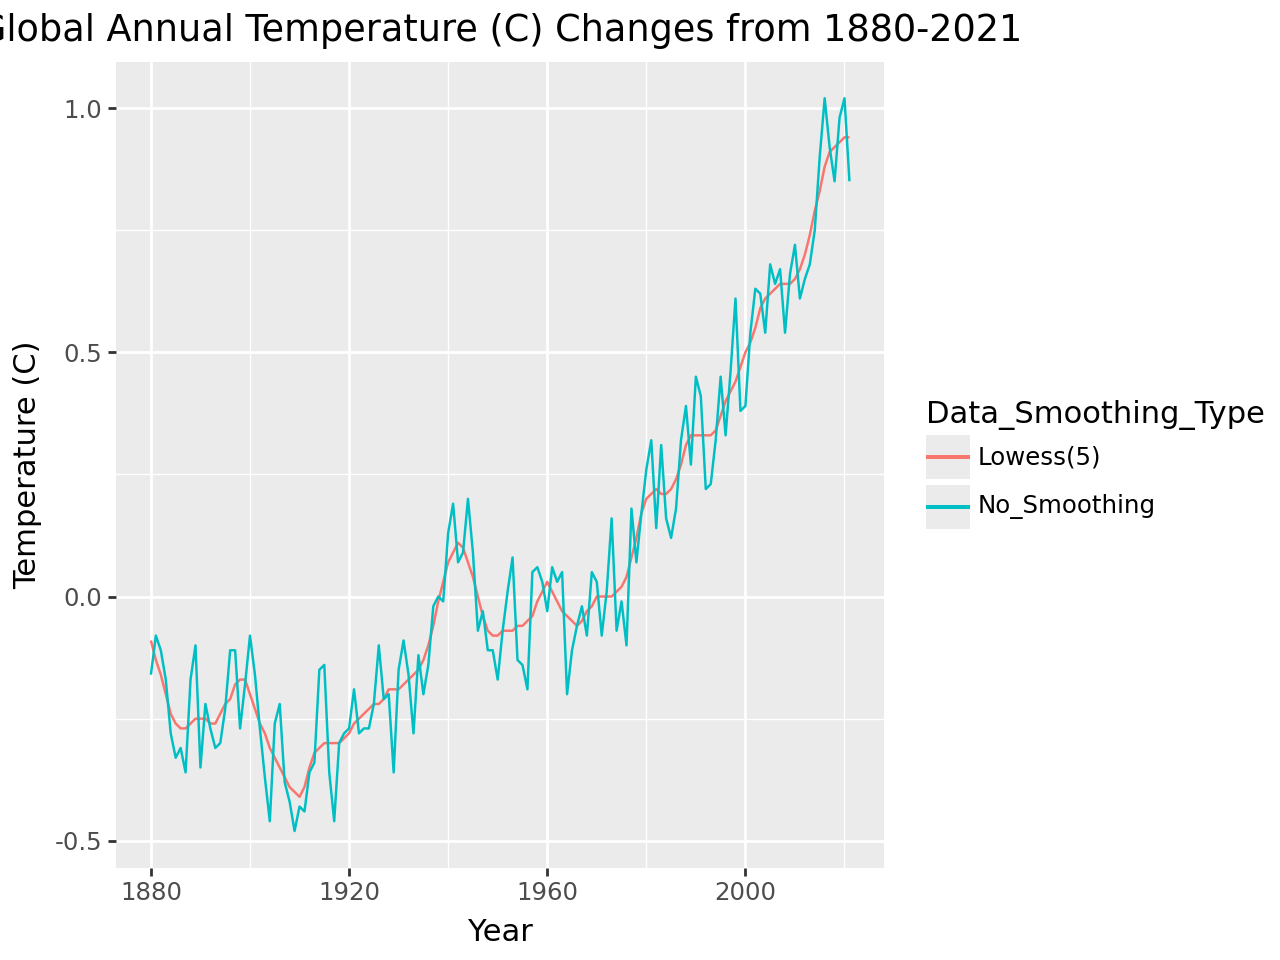

In [10]:
ggplot(temp_data_longer, aes(x='Year', y='Temperature_Data (C)', color='Data_Smoothing_Type')) + geom_line() + labs(y = 'Temperature (C)', title = 'Global Annual Temperature (C) Changes from 1880-2021')

The plot displays an upward trend in global mean temperature for both the raw and smoothed data. The significance of plotting the unsmoothed temperature data provides a nuanced understanding of the temperature's day-to-day measurement variability as well as anomalies that could be significant in analyzing unseasonal temperature events. Plotting the smooth data along with the unsmoothed serves as a visual record without random fluctuations, making the plot simpler to visualize the shape of the temperature changes. Looking at the plot between 1920 and 1960, there was a spike in global temperature, and it steadily rose even further post-1960 until 2021. This noticeable temperature rise may be attributed to the onset of the Industrial Revolution in the late 1800s, where intense energy demands and industrial growth resulted in escalating greenhouse gas emissions. 

## **Melting Ice Sheets** 🧊

**Data from**: <https://climate.nasa.gov/vital-signs/ice-sheets/?intent=121>

**Data Set**: http://climate.nasa.gov/system/internal_resources/details/original/499_GRN_ANT_mass_changes.csv

The dataset compiles land ice sheets' mass in both Antarctica and Greenland and is supported by NASA's Gravity Recovery and Climate Experiment (GRACE) mission and GRACE-FO satellites. These two co-orbiting satellites measure the land ice sheet mass changes by detecting variations in gravity to determine ice mass loss or gain. For instance, if ice sheets lose mass, the Earth’s gravitational pull in that region decreases, which the GRACE satellites will detect using their microwave ranging instrument. 

The three columns represented in this dataset include the year (represented as a four-digit number with the percentage of the year as a decimal point after the year), the mass of Greenland in Gross Tons, and the mass of Antarctica in Gross Tons. The GRACE mission began collecting ice sheet mass in 2002 and has supported data collection until 2017, and subsequently, after the 11-month data gap, the GRACE-FO mission resumed collecting data. Since this dataset presents measurements only from 2002 to 2014, there were no missing values in the dataset. Any potential missing measurements were most likely removed prior to publicizing the dataset.

In [11]:
# Data Processing
ice_melting_data = pd.read_csv("http://climate.nasa.gov/system/internal_resources/details/original/499_GRN_ANT_mass_changes.csv",
                        names = ['date', 'greenland', 'antarctica'], header = 9)

# Calculating differences in ice sheet melting
decline_greenland = (ice_melting_data['greenland'].iloc[-1] - ice_melting_data['greenland'].iloc[0])
decline_antarctica = (ice_melting_data['antarctica'].iloc[-1] - ice_melting_data['antarctica'].iloc[0])
times_greater = decline_greenland / decline_antarctica
print(f'Greenland is melting by {times_greater} greater than Antarctica')
ice_melting_data

Greenland is melting by 1.7210217501264542 greater than Antarctica


,date,greenland,antarctica
0,2002.29,1490.68,967.20
1,2002.35,1485.69,978.55
2,2002.62,1286.84,512.02
3,2002.71,1257.85,858.85
4,2002.79,1257.17,693.87
...,...,...,...
135,2014.45,-1672.08,-1021.70
136,2014.62,-1985.59,-1067.84
137,2014.71,-2024.82,-780.87
138,2014.79,-1973.96,-904.38


In [12]:
# Data frame manipulation
tidy_ice = ice_melting_data.melt(id_vars=['date'], value_vars=['greenland', 'antarctica'])
tidy_ice = tidy_ice.rename(columns = {
    'date': 'Year',
    'variable' : 'Site',
    'value' : 'Ice_Mass'})
tidy_ice

,Year,Site,Ice_Mass
0,2002.29,greenland,1490.68
1,2002.35,greenland,1485.69
2,2002.62,greenland,1286.84
3,2002.71,greenland,1257.85
4,2002.79,greenland,1257.17
...,...,...,...
275,2014.45,antarctica,-1021.70
276,2014.62,antarctica,-1067.84
277,2014.71,antarctica,-780.87
278,2014.79,antarctica,-904.38


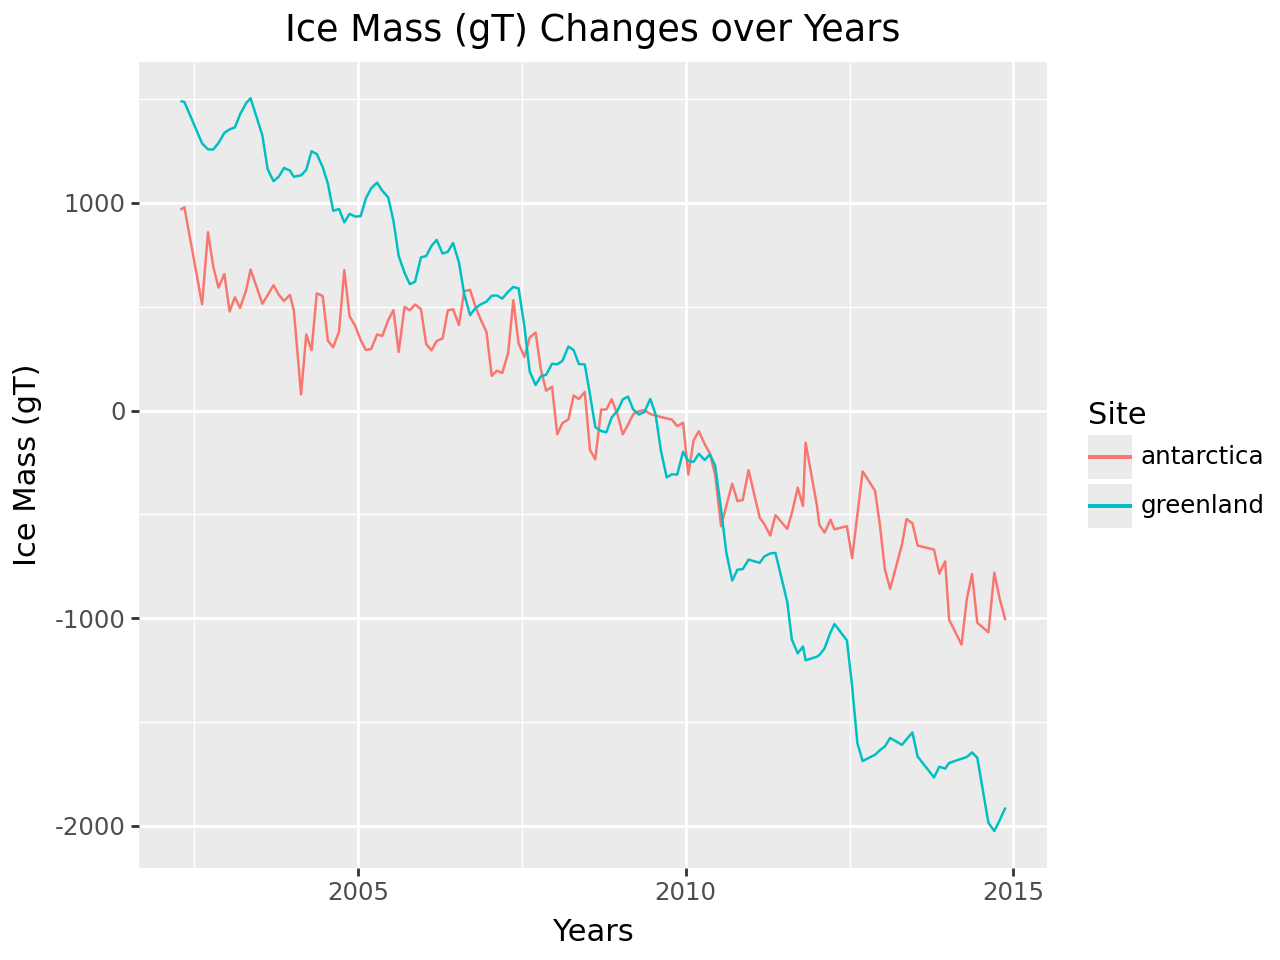

In [13]:
ggplot(tidy_ice, aes(x="Year", y="Ice_Mass", color = "Site")) + geom_line() + labs(y = 'Ice Mass (gT)', x = 'Years', title = 'Ice Mass (gT) Changes over Years')

In comparison to the land ice sheet mass changes between Antarctica and Greenland, we notice a downward trend between both regions, where the mass steadily declines over the years between 2002 and 2014. Greenland (represented as the green plot) has a notably greater decline in ice sheet mass than Antarctica (represented as the red plot), with a calculated decline of 1.72 times greater than Antarctica. Greenland’s rapid loss of ice sheet is likely due to its proximity to land mass areas, which surrounding heat and warmer air temperature could reduce the albedo effect and amplify surface melting overall. Antarctica is a pristine continent that is surrounded mostly by the Southern Ocean, thus colder and higher elevation of the ocean absorbs incoming solar radiation and slows the ice melting process.

------------------------

## **Rising Sea Levels** 🌊

**Data description**: <http://climate.nasa.gov/vital-signs/sea-level/>

**Raw data file**: <http://climate.nasa.gov/system/internal_resources/details/original/121_Global_Sea_Level_Data_File.txt>

The dataset compiles the global mean sea level (GMSL) variations computed by the NASA Goddard Space Flight Center and is integrated from multiple ocean altimetry missions, including TOPEX/Poseidon, Jason-1, OSTM/Jason-2, Jason-3, and Sentinel-6, to capture the sea level changes from 1992 to 2016. 

The 12 columns represented in this GMSL dataset are grouped by time, raw data, filtered data, and uncertainty metadata. For columns describing time, "Year_Frac" represents the time expressed as a fraction of the year, and "Cycle_Num" represents the count of ground-track repeat cycles for the altimetry satellite constellation. Subsequently, the two columns representing the raw GMSL data with variability include: GMSL_Var_NoGIA (the raw sea level anomaly measured by satellites without glacial isostatic adjustment (GIA) correction), and GMSL_Var_GIA (raw sea level anomaly with GIA correction applied and displays the most accurate representation of variability). The "filtered" section of the dataset also includes two smoothed GMSL columns, which are GMSL_Smoothed_NoGIA (smoothed trend that shows the sea level change relative to geological position) and GMSL_Smooth_GIA (filtered and standard measure of sea level rise). Lastly, the two columns, "GMSL_SD_GIA" and "GMSL_SD_NoGIA", provide the standard deviation and uncertainty associated with their respective measurement. The columns categorized as "raw", "filtered", and "uncertainty" GMSL data are expressed in millimeters (mm) +/- 4 mm.

Since the GMSL data is woven by multiple missions to ensure that there are no large data gaps, there are minimal missing data points. The associated measurement uncertainty is represented in the columns "GMSL_SD_GIA" and "GMSL_SD_NoGIA", which represent the standard deviation of the GMSL estimate for either the presence of GIA correction or no correction. Other unaccounted uncertainties in the dataset may be due to the errors in the geophysical corrections applied, such as the Wet Troposphere Correction. As for the spatial and temporal resolution of the GMSL dataset, the temporal resolution of the data is every measurement for 10 days, and the spatial resolution is measured over the ocean surface between approximately 66 degrees N and 66 degrees S latitude. 

In [14]:
# Data Processing and Cleaning
sea_columns = ['Altimeter_Type', 'Cycle', 'Year_Frac', 'N_Obs', 
               'N_W_Obs', 'GMSL_Var_NoGIA', 'GMSL_SD_NoGIA', 'GMSL_Smooth_NoGIA', 
               'GMSL_Var_GIA', 'GMSL_SD_GIA', 'GMSL_Smooth_GIA', 'GMSL_Smooth_GIA_NoSig']

sea_level_data = pd.read_csv("https://climate.nasa.gov/system/internal_resources/details/original/121_Global_Sea_Level_Data_File.txt",
                  sep = '\\s+',
                  comment = '#',
                  header = 36,
                  names=sea_columns
                  )
sea_level_data

,Altimeter_Type,Cycle,Year_Frac,N_Obs,N_W_Obs,GMSL_Var_NoGIA,GMSL_SD_NoGIA,GMSL_Smooth_NoGIA,GMSL_Var_GIA,GMSL_SD_GIA,GMSL_Smooth_GIA,GMSL_Smooth_GIA_NoSig
0,0,11,1993.014526,463892,336484.59,-13.74,89.23,-13.96,-13.46,89.19,-13.68,-14.09
1,0,12,1993.041626,458154,333208.19,-17.37,91.48,-15.19,-17.09,91.44,-14.91,-14.67
2,0,13,1993.068848,469524,341592.81,-17.38,88.61,-15.29,-17.09,88.55,-15.00,-14.24
3,0,14,1993.095947,419112,305335.41,-19.50,91.93,-15.60,-19.21,91.86,-15.31,-14.15
4,0,15,1993.123169,456793,330243.59,-14.15,90.05,-14.81,-13.84,90.00,-14.51,-13.05
...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,854,2015.901856,472216,344328.50,73.04,123.58,70.59,79.59,127.30,77.11,73.30
843,0,855,2015.928955,473526,343875.31,70.48,121.55,69.77,77.00,125.23,76.29,73.30
844,0,856,2015.956177,473929,342775.59,67.17,118.04,69.17,73.72,121.34,75.69,73.56
845,0,857,2015.983276,476782,345400.41,65.53,116.80,68.75,72.06,120.05,75.28,73.99


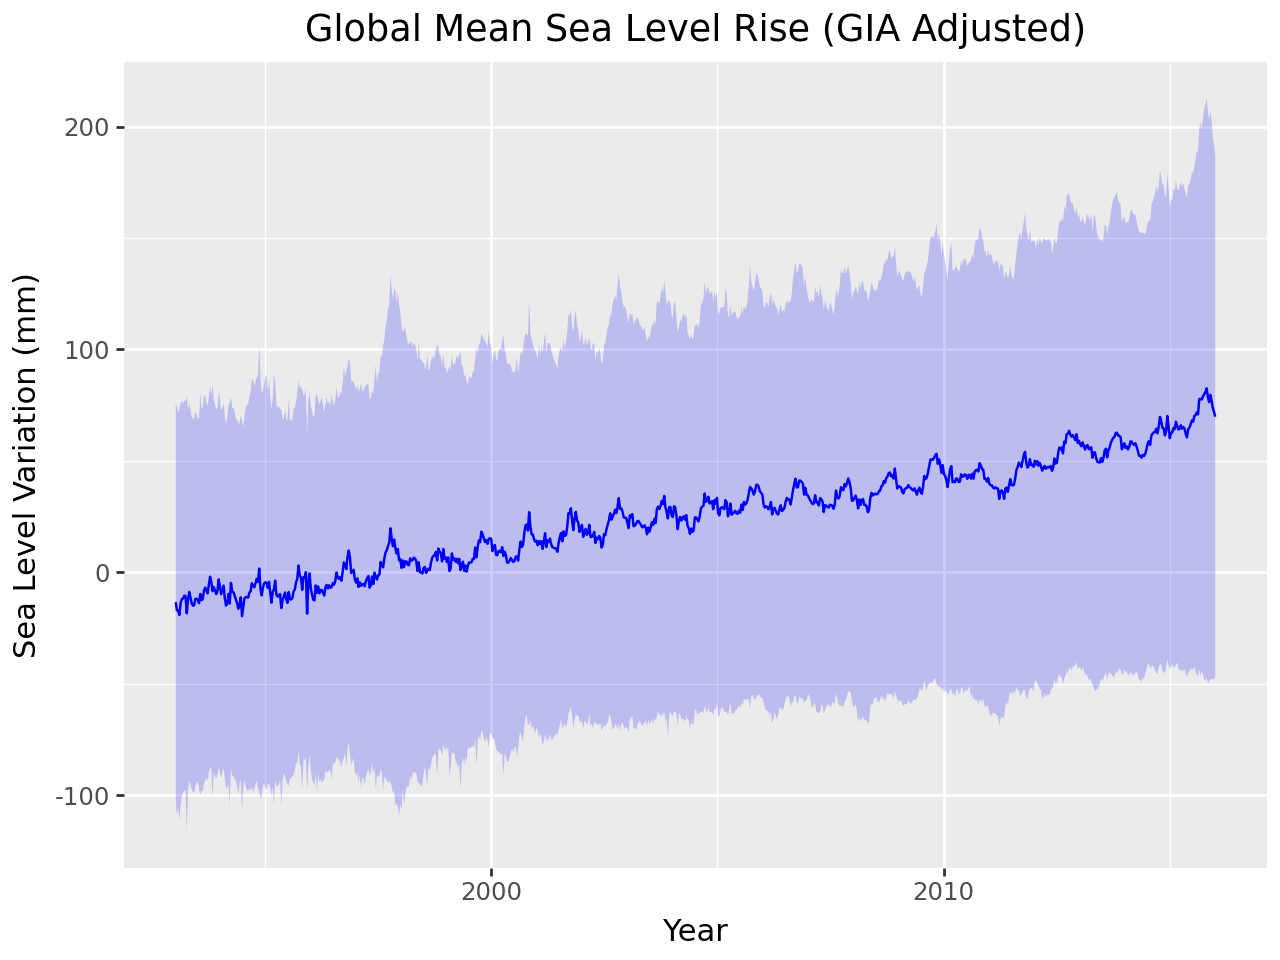

In [15]:
(
    ggplot(sea_level_data, aes(x="Year_Frac", y="GMSL_Var_GIA"))
    + geom_line(color="blue")
    + geom_ribbon(
        aes(
            ymin=sea_level_data["GMSL_Var_GIA"] - sea_level_data["GMSL_SD_GIA"],
            ymax=sea_level_data["GMSL_Var_GIA"] + sea_level_data["GMSL_SD_GIA"]
        ),
        alpha=0.2,
        fill="blue"
    )
    + labs(
        title="Global Mean Sea Level Rise (GIA Adjusted)",
        x="Year",
        y="Sea Level Variation (mm)"
    )
)

This plot visualizes the global mean sea level rise variation (GMSL) in mm with glacial isostatic adjustment (GIA) over the years between 1993 and 2016. The blue curve is the observed sea level rise and is compared with the blue shaded region that reflects the measurement uncertainty. This long-term trend displays a noticeable upward trend in the global sea level over the years, correlating with the trends of increasing carbon dioxide emissions, melting ice sheets, and rising temperatures. An increase in sea level is attributed to thermal expansion of ocean water and melting of ice sheets, which are solely driven by global warming and are interconnected with one another.


## **Arctic Sea Ice 🐻‍❄️**

The dataset includes monthly data for the extent of arctic sea ice, in millions of square kilometers, as well as the area of the arctic sea ice in millions of square kilometers from October 1978 to the present. The measurements were made from passive microwave satellite data that has been interpreted to estimate the area (exact coverage of ice in polar ocean regions) and extent (regions with at least 15% sea ice coverage). The temporal scale of the original data is 25 x 25 kilometers, and uncertainty in interpreting satellite data makes it difficult to get exact measurements. Additionally, the thickness of the sea ice is an important factor in determining changes in the presence of sea ice, but it is not included in this dataset and we will not be including it in our analysis for simplicity. 

- **Data description:** https://nsidc.org/data/g02135/versions/4
- **Data Set** https://data.ess-dive.lbl.gov/view/doi:10.3334/CDIAC/ATG.009

### Importing sea ice data

In [16]:
#this cell imports the monthly datafiles and combines them into a single dataframe
dir_list = [item for item in os.listdir('Sea Ice Data') if item.startswith("N")]
all_month_data = pd.DataFrame()
for file_name in dir_list:
    path = 'Sea Ice Data/' + file_name
    month = pd.read_csv(path)
    all_month_data = pd.concat([all_month_data, month])

#removing years with incomplete data
all_month_data = all_month_data[all_month_data[" extent"] > 0]
all_month_data = all_month_data[all_month_data["year"] > 1978]
all_month_data = all_month_data[all_month_data["year"] < 2025]
all_month_data.head(5)

,year,mo,source_dataset,region,extent,area
1,1979,11,NSIDC-0051,N,10.94,8.37
2,1980,11,NSIDC-0051,N,11.38,8.73
3,1981,11,NSIDC-0051,N,10.93,8.31
4,1982,11,NSIDC-0051,N,11.63,9.06
5,1983,11,NSIDC-0051,N,11.46,8.99


### Plotting sea ice data

To account for the annual fluctuation in sea ice levels, we have aggregated our data by year and graphed the <span style="color:blue">minimum (blue)</span>, <span style="color:green">mean (green)</span> and <span style="color:red">maximum (red)</span> values for each year. 1978 and 2025 are excluded in our data cleaning process because data is only present from October-December for this 1978 and January-August for 2025. If these years were included, it would not allow us to compare the statistics from the full year accurately.

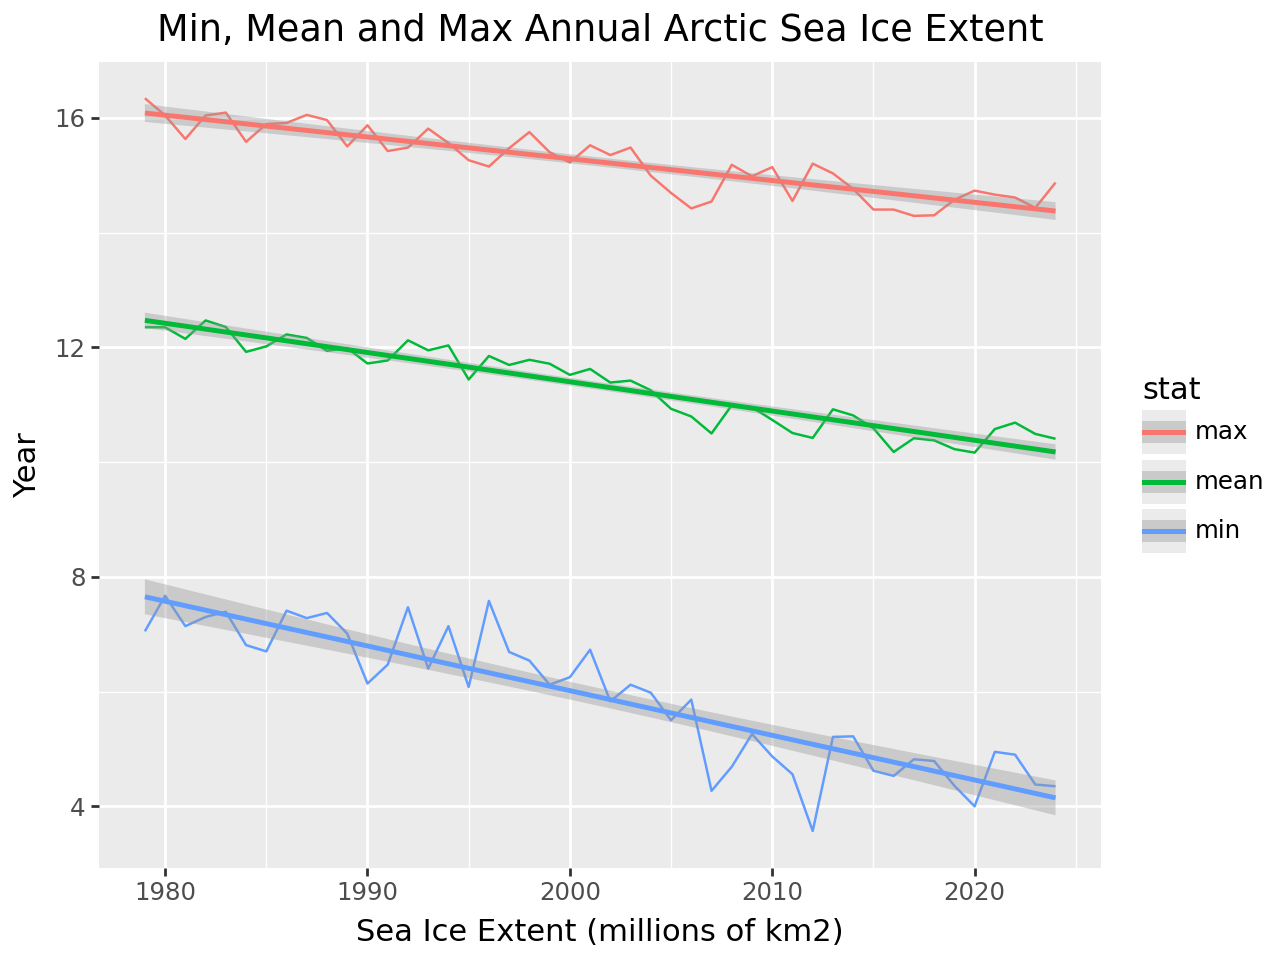

In [17]:
annual_sea_ice = all_month_data.groupby(by="year")[' extent'].agg(['mean', 'min', 'max']).reset_index()
df_melted = annual_sea_ice.melt(id_vars='year', 
                                value_vars=['min', 'max', 'mean'],
                                var_name='stat', 
                                value_name='sea ice extent (millions of km2)')
ggplot(df_melted, aes(x="year", y="sea ice extent (millions of km2)", color="stat")) + geom_line() + geom_smooth(method = "lm") + labs(
        title="Min, Mean and Max Annual Arctic Sea Ice Extent",
        x="Sea Ice Extent (millions of km2)",
        y="Year"
    )

From this, we can observe an overall **downward trend** in the average sea ice extent, the minimum sea ice extent, and the maximum sea ice extent in each year. The maximum and mean sea ice extent have decreased by about 2 million kilometers squared since 1979; the minimum sea ice extent has decreased by nearly double that. If it continues to decrease at this rate, then by 2060, there will be little-to-no sea ice left in the Arctic during the warmest months of the year. 

***

# **Conclusion 🖊**

In this notebook, explored how modern CO2 levels have been steadily increasing over the last 50 years based on observed data from the Mauna Loa Observatory. We then examined historic ice core data that gave us insight into the prehistoric fluctuations of CO2 levels in Earth's atmosphere. By comparing these two datasets, we found that modern levels exceed prehistoric levels by over 100 ppm and climbing. Next, we examined the rise in rise in global temperatures, which occurs over the same time period as the exponential increase in CO2 we analyzed previously. Global warming is one of the key indicators of climate change, and one that poses a significant threat to human life and ecosystems. In turn, this rise in temperature is associated with a recent decline in both sea ice and ice sheets, driven by warmer ocean and air temperatures. The melting of glaciers in Greenland and Antarctica is one of the biggest drivers of sea level rise, which poses an enormous threat to the billions of people who have built their lives along the world's coasts. 

While this data barely scratches the surface of the study of climate change, the datasets included in this notebook illustrate some of the key causes (rising levels of CO2 in the atmosphere) and effects (global warming, melting ice sheets and glaciers, and sea level rise) of climate change. 